In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import dataset for tensorflow use
from tensorflow.keras.datasets import fashion_mnist

(X_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
print(X_train.shape,y_train.shape,x_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
class_names = ['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat','5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']

## DATA Preprocessing

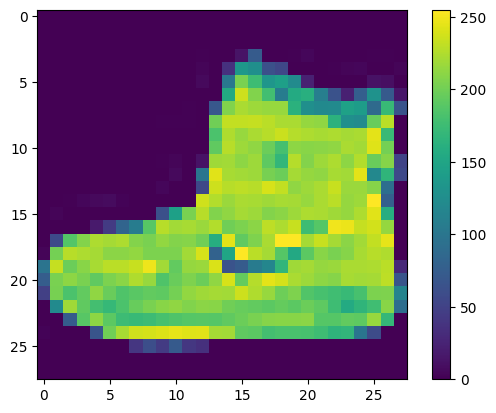

In [4]:
# Data Exploration
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [5]:
#Normalize Dataset
X_train = X_train/250.0
x_test = x_test/250.0

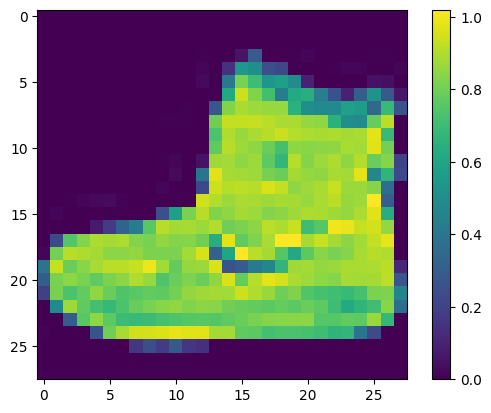

In [6]:
plt.imshow(X_train[0])
plt.colorbar()

In [7]:
# Flattening dataset
# Convert 2D array to one dimensional (convert into a vector)
X_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train = X_train.reshape(-1,28*28) # first argument select all image from trainset and convert into single dimension
x_test = x_test.reshape(-1,28*28)

In [9]:
#check for shape after flattening
X_train.shape,x_test.shape

((60000, 784), (10000, 784))

## Building the Model

In [11]:
# Define an sequential object
model = tf.keras.models.Sequential()
# Addging fully connect hidden layers
# 1. units (No. of Nuerons)
# 2. Activation function (RELU)
# 3. input shape = 784
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape =(784,)))

In [13]:
# Adding second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
# Regularization technique for overfitting

In [15]:
# Adding output layer
# units =10 : 10 output
# Use activation function as softmax for multiple output problems
# For binary classification problem , we use sigmoid acitvation function
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

## Train Model

In [17]:
# compile model
# 1. Optimizer = adam(minimize loss function)
# 2. loss function = Here we use sparse_categorical_crossentropy, (Act as guid to optimizer)
# 3. metrics = For any classification problem , we need check accuracy. Here we use sparse_categorical_accuracy
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Train model 
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5567 - sparse_categorical_accuracy: 0.8068
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4184 - sparse_categorical_accuracy: 0.8490
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3847 - sparse_categorical_accuracy: 0.8599
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3689 - sparse_categorical_accuracy: 0.8657
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3498 - sparse_categorical_accuracy: 0.8706
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3391 - sparse_categorical_accuracy: 0.8738
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3280 - sparse_categorical_accuracy: 0.8794
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3211 - sparse_categorical_accuracy: 0.8814
Epoch 9/10
1875/1875 [==========

## model evaluation and performance

In [19]:
# model evaluation
test_loss, test_accuracy = model.evaluate(x_test,y_test)
print(f'Test accuracy : {test_accuracy}')

313/313 [==============================] - 2s 4ms/step - loss: 0.3413 - sparse_categorical_accuracy: 0.8796
Test accuracy : 0.8795999884605408


In [25]:
y_pred = model.predict(x_test)
"""
prediction is an array of 10 numbers. They represent the model's 
"confidence" that the image corresponds to each of the 10 different articles of clothing. 
You can see which label has the  highest confidence value:
"""

np.argmax(y_pred[0])

313/313 [==============================] - 0s 1ms/step


9

In [26]:
# Examining the test label shows that this classification is correct
print(y_test[0])

9


In [34]:
from sklearn.metrics import confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[851,   1,  16,  20,   1,   0, 102,   0,   9,   0],
       [  4, 971,   1,  17,   4,   0,   1,   0,   2,   0],
       [ 14,   2, 844,   5,  67,   0,  66,   0,   2,   0],
       [ 28,  10,  13, 884,  32,   0,  31,   0,   2,   0],
       [  0,   0, 155,  34, 743,   0,  68,   0,   0,   0],
       [  0,   0,   0,   0,   0, 947,   0,  28,   1,  24],
       [133,   0, 105,  25,  59,   0, 667,   0,  11,   0],
       [  0,   0,   0,   0,   0,  10,   0, 950,   0,  40],
       [  1,   0,   5,   3,   5,   2,   8,   3, 973,   0],
       [  0,   0,   0,   0,   0,   4,   1,  29,   0, 966]], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test, y_pred_classes)
accuracy

0.8796